In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
df.shape

(42000, 785)

In [4]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
x.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [6]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

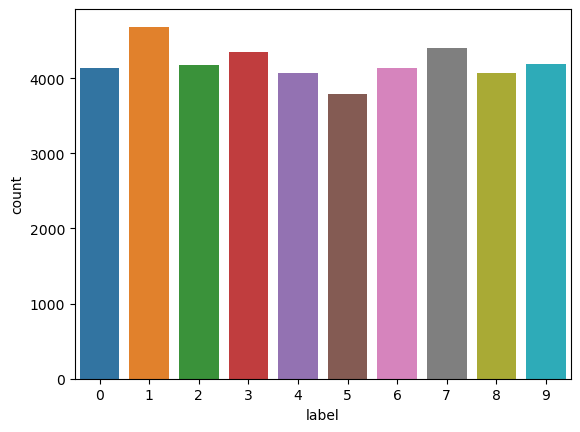

In [7]:
sns.countplot(data=df,x=y) #x=x-axis

In [8]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
9096      7       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
9096       0  ...         0         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  
9096         0         0         0         0  

[1 rows x 785 columns]

Text(0.5, 1.0, 'Number is 5')

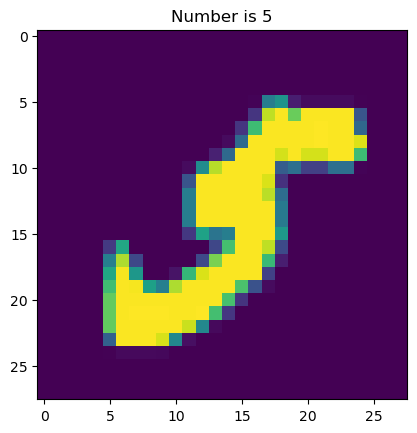

In [9]:
plt.imshow(x.iloc[30783,:].values.reshape(28,28))
plt.title(f"Number is {y[30783]}")

Text(0.5, 1.0, 'Number is 3')

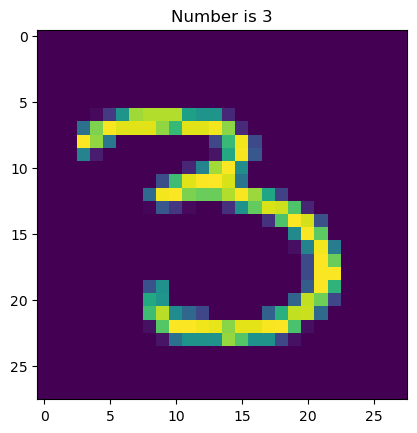

In [10]:
plt.imshow(x.iloc[5483,:].values.reshape(28,28))
plt.title(f"Number is {y[5483]}")

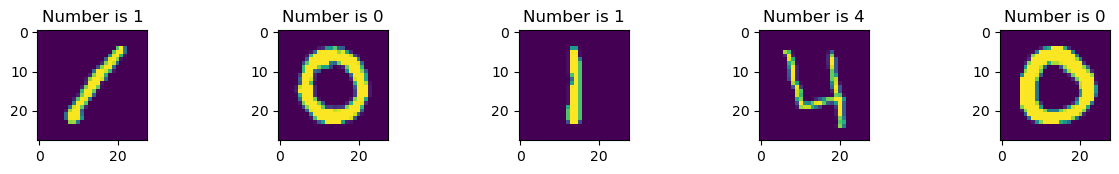

In [11]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(6,5,i+1)
    plt.imshow(x.iloc[i,:].values.reshape(28,28))
    plt.title(f"Number is {y[i]}")

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [13]:
x_train.shape

(29400, 784)

In [14]:
x_test.shape

(12600, 784)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9657142857142857

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
std = StandardScaler()
x_train_trf = std.fit_transform(x_train)
x_test_trf = std.transform(x_test)

In [22]:
x_train_trf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
x_test_trf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=100)

In [26]:
x_train_pca = pca.fit_transform(x_train_trf)
x_test_pca = pca.transform(x_test)

In [27]:
x_train_pca.shape

(29400, 100)

In [28]:
x_test_pca.shape

(12600, 100)

In [29]:
knn.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [30]:
y_pred_pca = knn.predict(x_test_pca)

In [31]:
accuracy_score(y_test,y_pred_pca)

0.7686507936507937

In [32]:
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_pca = pca.fit_transform(x_train_trf)
    x_test_pca = pca.transform(x_test)
    knn.fit(x_train_pca,y_train)
    y_pred_pca = knn.predict(x_test_pca)
    print(f"Iteration : {i} {accuracy_score(y_test,y_pred_pca)}")

Iteration : 1 0.18619047619047618
Iteration : 2 0.1353174603174603
Iteration : 3 0.2311111111111111
Iteration : 4 0.2592857142857143
Iteration : 5 0.36277777777777775
Iteration : 6 0.4015873015873016
Iteration : 7 0.43047619047619046
Iteration : 8 0.47023809523809523
Iteration : 9 0.47293650793650793
Iteration : 10 0.46190476190476193
Iteration : 11 0.4676984126984127
Iteration : 12 0.4824603174603175
Iteration : 13 0.5455555555555556
Iteration : 14 0.571984126984127
Iteration : 15 0.5763492063492064
Iteration : 16 0.5856349206349206
Iteration : 17 0.5795238095238096
Iteration : 18 0.5778571428571428
Iteration : 19 0.5855555555555556
Iteration : 20 0.6157936507936508
Iteration : 21 0.6216666666666667
Iteration : 22 0.6230952380952381
Iteration : 23 0.6364285714285715
Iteration : 24 0.6385714285714286
Iteration : 25 0.6544444444444445
Iteration : 26 0.6597619047619048
Iteration : 27 0.668968253968254
Iteration : 28 0.6714285714285714
Iteration : 29 0.6719047619047619
Iteration : 30 0.67

KeyboardInterrupt: 

In [47]:
pca_dim = PCA(n_components=3)
x_train_pca = pca_dim.fit_transform(x_train_trf)
x_test_pca = pca_dim.transform(x_test)
x_train_pca.shape

(29400, 3)

In [38]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import plotly.express as px
px.scatter(x_train_pca[:,0],x_train_pca[:,1])

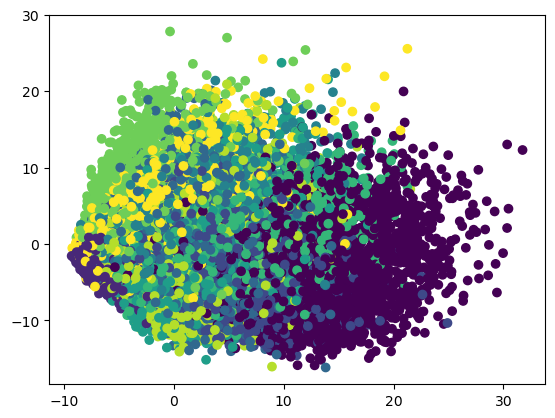

In [41]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)

In [45]:
d = y_train.astype(str)

In [49]:
px.scatter_3d(x=x_train_pca[:,0],y=x_train_pca[:,1],z=x_train_pca[:,2],color=d)

In [50]:
pca_dim.explained_variance_

array([40.59588171, 29.31939534, 26.70539786])

In [57]:
pca.components_.shape

(31, 784)

In [53]:
pca_dim.explained_variance_ratio_*100

array([5.84935171, 4.22455304, 3.84790915])

In [54]:
d = y_train.astype(str)
pca_dim = PCA()
x_train_pca = pca_dim.fit_transform(x_train_trf)
x_test_pca = pca_dim.transform(x_test)
pca_dim.explained_variance_ratio_*100

array([5.84935171e+00, 4.22455317e+00, 3.84790932e+00, 2.99566411e+00,
       2.60283768e+00, 2.27062325e+00, 2.00722706e+00, 1.80402768e+00,
       1.60330442e+00, 1.45271448e+00, 1.40019450e+00, 1.25521838e+00,
       1.15606423e+00, 1.13774951e+00, 1.07853036e+00, 1.03298491e+00,
       9.70395520e-01, 9.57399383e-01, 9.34237163e-01, 9.12905801e-01,
       8.58260664e-01, 8.33084537e-01, 8.04735721e-01, 7.70710198e-01,
       7.48672901e-01, 7.13847382e-01, 7.08900817e-01, 6.86255797e-01,
       6.51284381e-01, 6.37463674e-01, 6.28489824e-01, 6.22514458e-01,
       6.00492008e-01, 5.86809038e-01, 5.80058199e-01, 5.67056254e-01,
       5.49320588e-01, 5.35830886e-01, 5.23765424e-01, 5.10018441e-01,
       4.98834932e-01, 4.93105367e-01, 4.77954113e-01, 4.67097346e-01,
       4.62488902e-01, 4.57313741e-01, 4.54632903e-01, 4.41634541e-01,
       4.37056088e-01, 4.26388524e-01, 4.19607359e-01, 4.15478962e-01,
       4.05136934e-01, 4.01094749e-01, 3.88302168e-01, 3.85735414e-01,
      

In [55]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05849352, 0.10073905, 0.13921814, 0.16917478, 0.19520316,
       0.21790939, 0.23798166, 0.25602194, 0.27205498, 0.28658213,
       0.30058407, 0.31313624, 0.32469684, 0.33607432, 0.34685956,
       0.35718933, 0.36689314, 0.37646614, 0.38580762, 0.3949358 ,
       0.40351807, 0.4118471 , 0.41988905, 0.42759205, 0.4350775 ,
       0.44220703, 0.449281  , 0.45613503, 0.4626266 , 0.46891583,
       0.47514801])

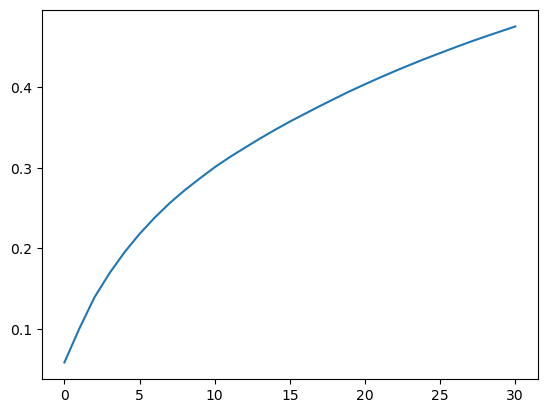

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))